In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initial Data Exploration

In [2]:
df = pd.read_csv("Aemf1.csv")
df.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [3]:
df.shape

(41714, 19)

In [4]:
df.dtypes

City                            object
Price                          float64
Day                             object
Room Type                       object
Shared Room                       bool
Private Room                      bool
Person Capacity                float64
Superhost                         bool
Multiple Rooms                   int64
Business                         int64
Cleanliness Rating             float64
Guest Satisfaction             float64
Bedrooms                         int64
City Center (km)               float64
Metro Distance (km)            float64
Attraction Index               float64
Normalised Attraction Index    float64
Restraunt Index                float64
Normalised Restraunt Index     float64
dtype: object

In [5]:
df.columns

Index(['City', 'Price', 'Day', 'Room Type', 'Shared Room', 'Private Room',
       'Person Capacity', 'Superhost', 'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
       'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index'],
      dtype='object')

# Data Cleaning

In [6]:
df = df.drop(columns=["Attraction Index", "Normalised Attraction Index", "Restraunt Index", "Normalised Restraunt Index", "Shared Room", "Private Room", "Superhost"])

In [7]:
df.isnull().sum()

City                   0
Price                  0
Day                    0
Room Type              0
Person Capacity        0
Multiple Rooms         0
Business               0
Cleanliness Rating     0
Guest Satisfaction     0
Bedrooms               0
City Center (km)       0
Metro Distance (km)    0
dtype: int64

In [8]:
df.dtypes

City                    object
Price                  float64
Day                     object
Room Type               object
Person Capacity        float64
Multiple Rooms           int64
Business                 int64
Cleanliness Rating     float64
Guest Satisfaction     float64
Bedrooms                 int64
City Center (km)       float64
Metro Distance (km)    float64
dtype: object

In [9]:
df.columns = [column.replace(" ", "_").replace("(", "").replace(")", "").lower() for column in df.columns]
df.columns

Index(['city', 'price', 'day', 'room_type', 'person_capacity',
       'multiple_rooms', 'business', 'cleanliness_rating',
       'guest_satisfaction', 'bedrooms', 'city_center_km',
       'metro_distance_km'],
      dtype='object')

# Exploring numerical and categorical variables

In [10]:
df.select_dtypes("number").nunique().sort_values(ascending=False)

city_center_km        41714
metro_distance_km     41714
price                  8087
guest_satisfaction       51
cleanliness_rating        9
bedrooms                  9
person_capacity           5
business                  2
multiple_rooms            2
dtype: int64

In [11]:
categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 3]
categorical_from_numerical

,multiple_rooms,business
0,1,0
1,0,0
2,0,1
3,0,1
4,0,0
...,...,...
41709,0,1
41710,0,0
41711,0,0
41712,0,0


In [12]:
df_categorical = pd.concat([df.select_dtypes("object"), categorical_from_numerical], axis=1)
df_numerical = df.select_dtypes("number").drop(columns=categorical_from_numerical.columns)

In [13]:
df_categorical

,city,day,room_type,multiple_rooms,business
0,Amsterdam,Weekday,Private room,1,0
1,Amsterdam,Weekday,Private room,0,0
2,Amsterdam,Weekday,Private room,0,1
3,Amsterdam,Weekday,Private room,0,1
4,Amsterdam,Weekday,Private room,0,0
...,...,...,...,...,...
41709,Vienna,Weekend,Entire home/apt,0,1
41710,Vienna,Weekend,Entire home/apt,0,0
41711,Vienna,Weekend,Entire home/apt,0,0
41712,Vienna,Weekend,Private room,0,0


In [14]:
df_numerical

,price,person_capacity,cleanliness_rating,guest_satisfaction,bedrooms,city_center_km,metro_distance_km
0,194.033698,2.0,10.0,93.0,1,5.022964,2.539380
1,344.245776,4.0,8.0,85.0,1,0.488389,0.239404
2,264.101422,2.0,9.0,87.0,1,5.748312,3.651621
3,433.529398,4.0,9.0,90.0,2,0.384862,0.439876
4,485.552926,2.0,10.0,98.0,1,0.544738,0.318693
...,...,...,...,...,...,...,...
41709,715.938574,6.0,10.0,100.0,3,0.530181,0.135447
41710,304.793960,2.0,8.0,86.0,1,0.810205,0.100839
41711,637.168969,2.0,10.0,93.0,1,0.994051,0.202539
41712,301.054157,2.0,10.0,87.0,1,3.044100,0.287435


# Univariate Analysis

## Categorical variables

In [89]:
df_categorical.columns

Index(['city', 'day', 'room_type', 'multiple_rooms', 'business'], dtype='object')

In [92]:
city_frequency = df["city"].value_counts()
city_proportion = df["city"].value_counts(normalize=True)

city_frequency, city_proportion

(city
 Rome         9027
 Paris        6688
 Lisbon       5763
 Athens       5280
 Budapest     4022
 Vienna       3537
 Barcelona    2833
 Berlin       2484
 Amsterdam    2080
 Name: count, dtype: int64,
 city
 Rome         0.216402
 Paris        0.160330
 Lisbon       0.138155
 Athens       0.126576
 Budapest     0.096418
 Vienna       0.084792
 Barcelona    0.067915
 Berlin       0.059548
 Amsterdam    0.049863
 Name: proportion, dtype: float64)

/var/folders/3j/f7d6p9t136x34vdmdy30wrrc0000gn/T/ipykernel_4049/1725129980.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_frequency.index, y=city_frequency.values , palette="Set3")


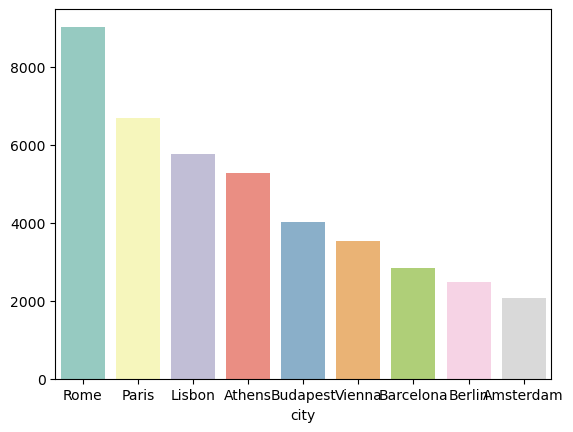

In [97]:
sns.barplot(x=city_frequency.index, y=city_frequency.values , palette="Set3")
plt.show();

In [93]:
day_frequency = df["day"].value_counts()
day_proportion = df["day"].value_counts(normalize=True)

day_frequency, day_proportion

(day
 Weekday    20886
 Weekend    20828
 Name: count, dtype: int64,
 day
 Weekday    0.500695
 Weekend    0.499305
 Name: proportion, dtype: float64)

/var/folders/3j/f7d6p9t136x34vdmdy30wrrc0000gn/T/ipykernel_4049/29731049.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_frequency.index, y=day_frequency.values , palette="Set3")


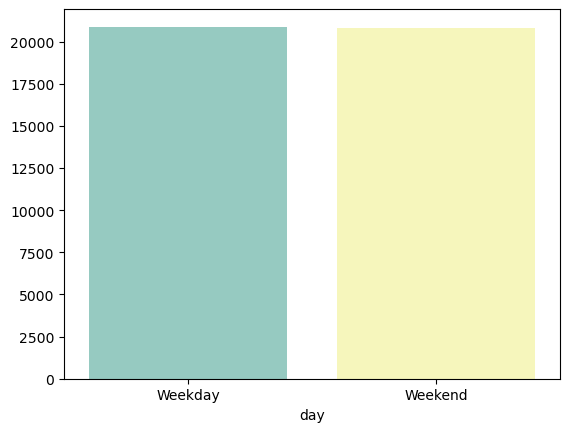

In [98]:
sns.barplot(x=day_frequency.index, y=day_frequency.values , palette="Set3")
plt.show();

In [94]:
room_type_frequency = df["room_type"].value_counts()
room_type_proportion = df["room_type"].value_counts(normalize=True)

room_type_frequency, room_type_proportion

(room_type
 Entire home/apt    28264
 Private room       13134
 Shared room          316
 Name: count, dtype: int64,
 room_type
 Entire home/apt    0.677566
 Private room       0.314858
 Shared room        0.007575
 Name: proportion, dtype: float64)

/var/folders/3j/f7d6p9t136x34vdmdy30wrrc0000gn/T/ipykernel_4049/4268519987.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_frequency.index, y=room_type_frequency.values , palette="Set3")


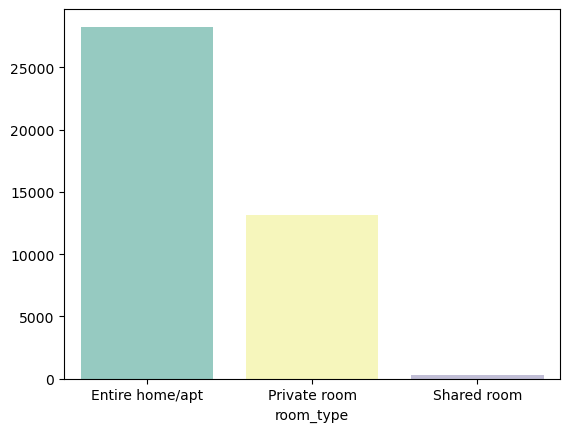

In [99]:
sns.barplot(x=room_type_frequency.index, y=room_type_frequency.values , palette="Set3")
plt.show();

In [95]:
multiple_rooms_frequency = df["multiple_rooms"].value_counts()
multiple_rooms_proportion = df["multiple_rooms"].value_counts(normalize=True)

multiple_rooms_frequency, multiple_rooms_proportion

(multiple_rooms
 0    29397
 1    12317
 Name: count, dtype: int64,
 multiple_rooms
 0    0.704727
 1    0.295273
 Name: proportion, dtype: float64)

/var/folders/3j/f7d6p9t136x34vdmdy30wrrc0000gn/T/ipykernel_4049/795291819.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=multiple_rooms_frequency.index, y=multiple_rooms_frequency.values , palette="Set3")


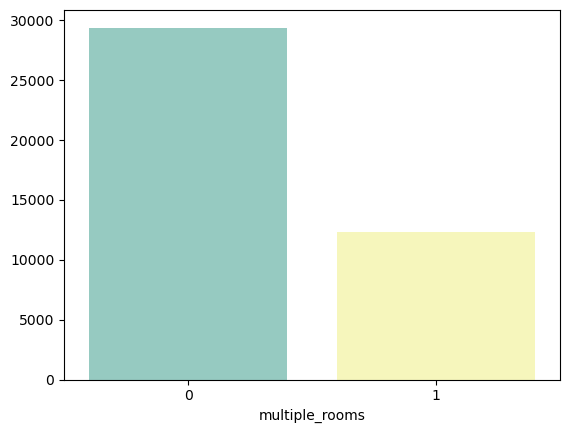

In [100]:
sns.barplot(x=multiple_rooms_frequency.index, y=multiple_rooms_frequency.values , palette="Set3")
plt.show();

In [96]:
business_frequency = df["business"].value_counts()
business_proportion = df["business"].value_counts(normalize=True)

business_frequency, business_proportion

(business
 0    27482
 1    14232
 Name: count, dtype: int64,
 business
 0    0.65882
 1    0.34118
 Name: proportion, dtype: float64)

/var/folders/3j/f7d6p9t136x34vdmdy30wrrc0000gn/T/ipykernel_4049/1334820625.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=business_frequency.index, y=business_frequency.values , palette="Set3")


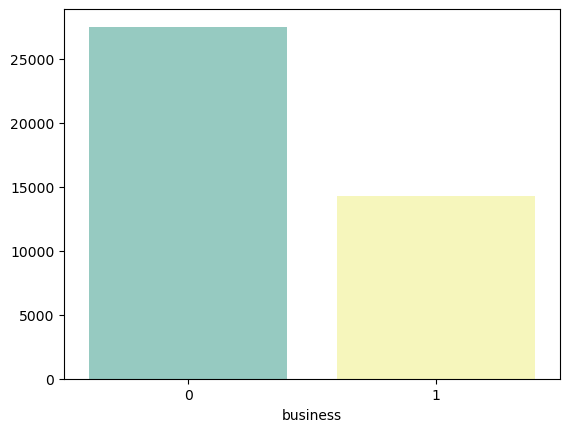

In [101]:
sns.barplot(x=business_frequency.index, y=business_frequency.values , palette="Set3")
plt.show();

### Insights from categorical variables

- The city with most offers is Rome (21%) and the one with fewest is Amsterdam (4%).
- There's as much offer on weekends as on weekdays.
- The majority of offers (67%) are entire home/apartment rentals.
- 70% of the offerings have only one room.
- 34% of hosts are businesses with more than 4 properties listed.

## Numerical variables

In [102]:
df_numerical.columns

Index(['price', 'person_capacity', 'cleanliness_rating', 'guest_satisfaction',
       'bedrooms', 'city_center_km', 'metro_distance_km'],
      dtype='object')

In [106]:
df_numerical.describe().round(2)

,price,person_capacity,cleanliness_rating,guest_satisfaction,bedrooms,city_center_km,metro_distance_km
count,41714.00,41714.00,41714.00,41714.00,41714.00,41714.00,41714.00
mean,260.09,3.24,9.44,93.10,1.17,2.68,0.60
std,279.41,1.30,0.89,8.14,0.64,2.00,0.71
min,34.78,2.00,2.00,20.00,0.00,0.02,0.00
25%,144.02,2.00,9.00,90.00,1.00,1.28,0.24
50%,203.82,3.00,10.00,95.00,1.00,2.25,0.39
75%,297.37,4.00,10.00,98.00,1.00,3.58,0.68
max,18545.45,6.00,10.00,100.00,10.00,25.28,14.27


In [17]:
df_numerical["price"].mode()

0    184.462161
Name: price, dtype: float64

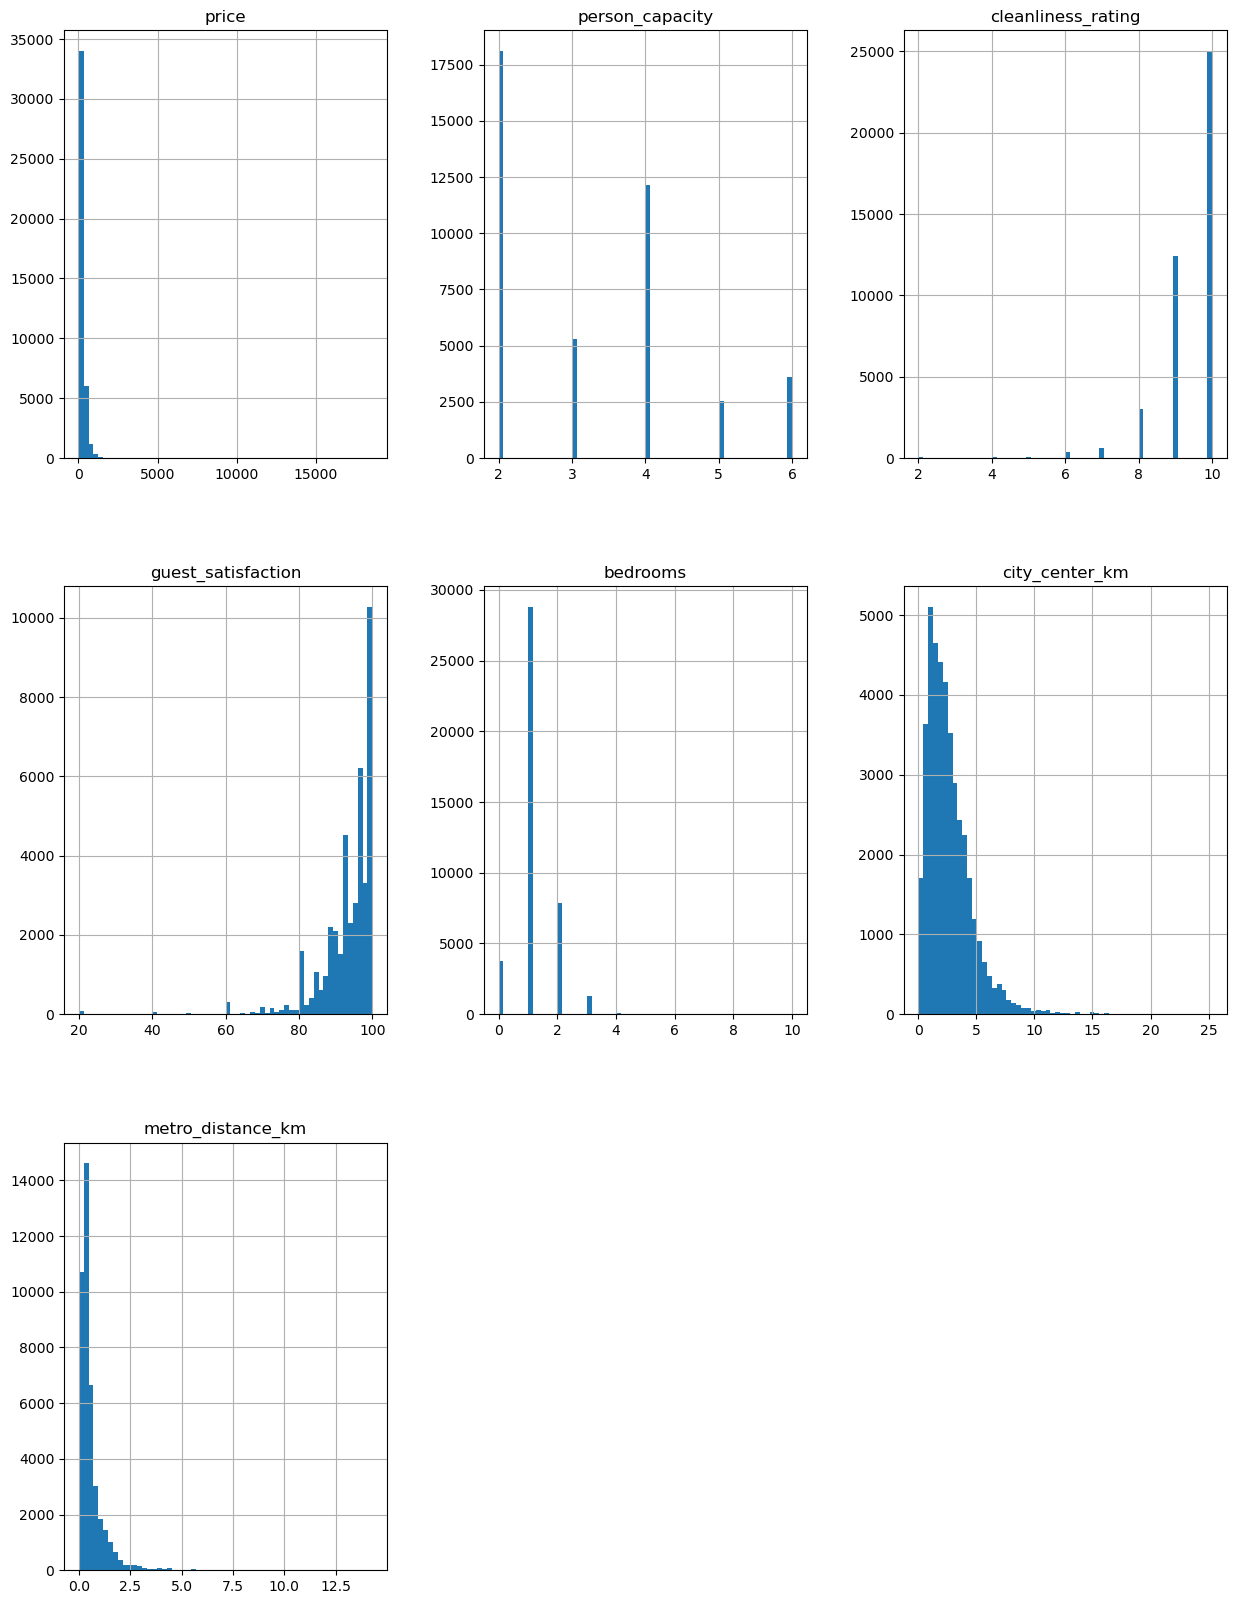

In [107]:
df_numerical.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10)
plt.show();

In [10]:
df["price"].describe()

count    41714.000000
mean       260.094423
std        279.408493
min         34.779339
25%        144.016085
50%        203.819274
75%        297.373358
max      18545.450285
Name: price, dtype: float64

In [11]:
# Uw = Q3 + 1,5 IQR
Uw = 297.373358 + 1.5 * (297.373358 - 144.016085)
Uw

527.4092674999999

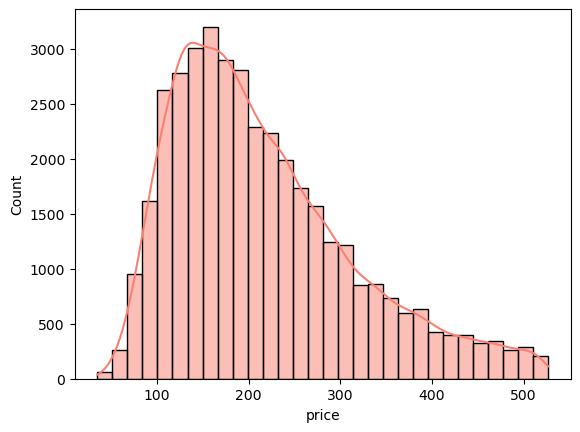

In [12]:
sns.histplot(df["price"][df["price"] < 527], kde=True, bins=30, color="salmon")
plt.show();

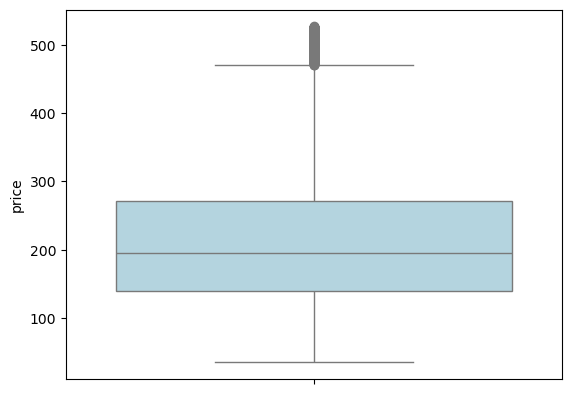

In [13]:
sns.boxplot(data = df["price"][df["price"] < 527], color="lightblue")
plt.show();

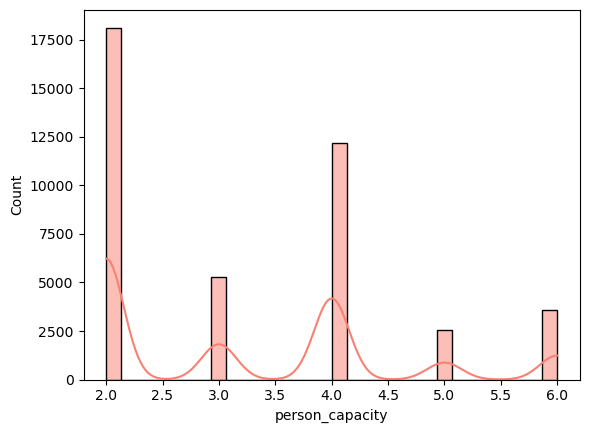

In [115]:
sns.histplot(df["person_capacity"], kde=True, bins=30, color="salmon")
plt.show();

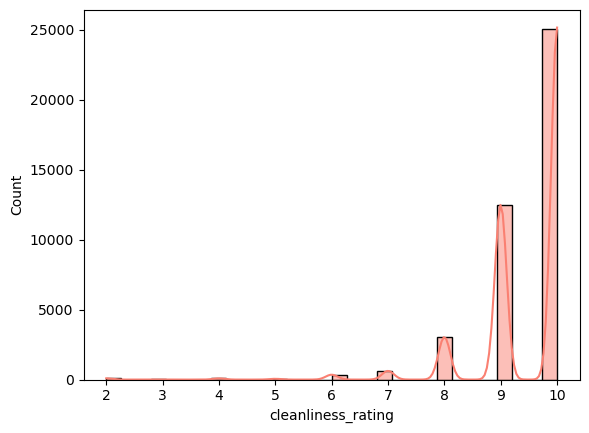

In [118]:
sns.histplot(df["cleanliness_rating"], kde=True, bins=30, color="salmon")
plt.show();

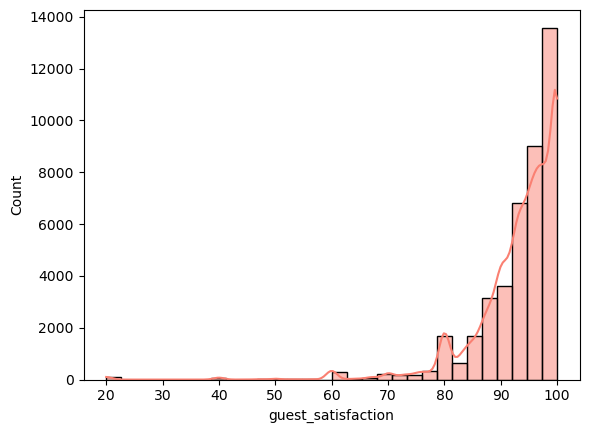

In [119]:
sns.histplot(df["guest_satisfaction"], kde=True, bins=30, color="salmon")
plt.show();

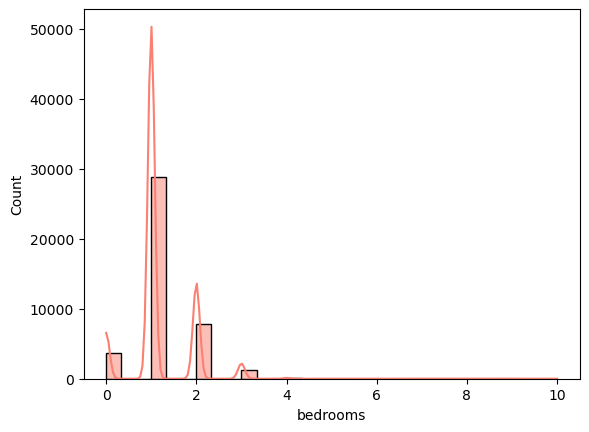

In [120]:
sns.histplot(df["bedrooms"], kde=True, bins=30, color="salmon")
plt.show();

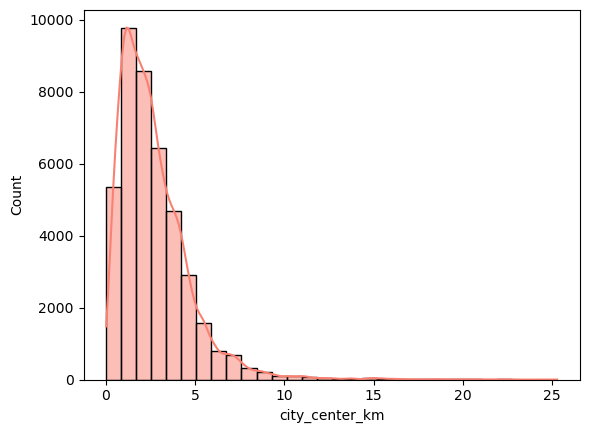

In [121]:
sns.histplot(df["city_center_km"], kde=True, bins=30, color="salmon")
plt.show();

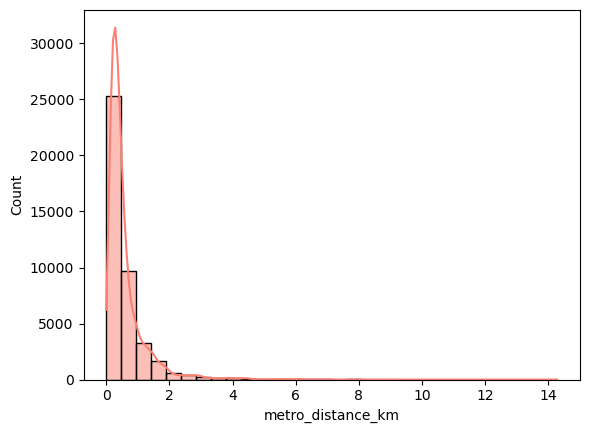

In [122]:
sns.histplot(df["metro_distance_km"], kde=True, bins=30, color="salmon")
plt.show();